## 0. General Imports

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
prices_annual = pd.read_csv('FAOSTAT/Prices_E_All_Data_(Normalized).zip', delimiter = ',', encoding = 'ISO-8859-1')
prices_arch = pd.read_csv('FAOSTAT/PricesArchive_E_All_Data_(Normalized).zip', delimiter = ',', encoding = 'ISO-8859-1')
exchange_rates = pd.read_csv('FAOSTAT/Exchange_rate_E_All_Data_(Normalized).zip', delimiter = ',', encoding = 'ISO-8859-1')

In [118]:
prices_annual.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1993,1993,LCU,46000.0,NaN
1,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1994,1994,LCU,50000.0,NaN
2,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1995,1995,LCU,62000.0,NaN
3,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1996,1996,LCU,50000.0,NaN
4,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1997,1997,LCU,41000.0,NaN


In [119]:
prices_arch.head()

,CountryCode,Country,ItemCode,Item,ElementGroup,ElementCode,Element,Year,Unit,Value,Flag
0,4,Algeria,221,"Almonds, with shell",53,5530,Producer Price (LCU/tonne),1966,LCU,1150.0,F
1,4,Algeria,221,"Almonds, with shell",53,5530,Producer Price (LCU/tonne),1967,LCU,1140.0,F
2,4,Algeria,221,"Almonds, with shell",53,5530,Producer Price (LCU/tonne),1968,LCU,1210.0,F
3,4,Algeria,221,"Almonds, with shell",53,5530,Producer Price (LCU/tonne),1969,LCU,1200.0,F
4,4,Algeria,221,"Almonds, with shell",53,5530,Producer Price (LCU/tonne),1970,LCU,1200.0,F


In [120]:
exchange_rates.head()

,Area Code,Area,Item Code,Item,ISO Currency Code,Currency,Year Code,Year,Unit,Value,Flag,Note
0,2,Afghanistan,5540,Standard local currency units per USD,AFN,Afghani,1970,1970,NaN,0.045,X,Data from UNSD AMA
1,2,Afghanistan,5540,Standard local currency units per USD,AFN,Afghani,1971,1971,NaN,0.045,X,Data from UNSD AMA
2,2,Afghanistan,5540,Standard local currency units per USD,AFN,Afghani,1972,1972,NaN,0.045,X,Data from UNSD AMA
3,2,Afghanistan,5540,Standard local currency units per USD,AFN,Afghani,1973,1973,NaN,0.045,X,Data from UNSD AMA
4,2,Afghanistan,5540,Standard local currency units per USD,AFN,Afghani,1974,1974,NaN,0.045,X,Data from UNSD AMA


## 1. Data preparation

### 1.1 Producer prices
#### 1.1.1 Data Description

The FAO Database offers a variety of datasets containing information about the production of every country for all years between 1961 and 2017.
##### Producer prices -annual
<details>
  <summary>Description</summary> 
  This sub-domain contains data on Agriculture Producer Prices. These are prices received by farmers for primary crops, live animals and livestock primary products as collected at the point of initial sale (prices paid at the farm-gate). Annual data are provided from 1991 for over 160 countries and about 200 commodities.
</details>

<details>
  <summary>Path</summary>
  
  Data/FAOSTAT/Prices_E_All_Data_(Normalized).zip
</details>

##### Exchange rates -annual
<details>
  <summary>Description</summary>  
  Annual exchange rates, national currency units per U.S. dollar.
</details>

<details>
  <summary>Path</summary>  
  Data/FAOSTAT/Exchange_rate_E_All_Data_(Normalized).zip
</details>

##### Producer prices -monthly
<details>
  <summary>Description</summary>  
  This sub-domain contains data on Agriculture Producer Prices (APP). These are prices received by farmers for primary crops, live animals and livestock primary products as collected at the point of initial sale (prices paid at the farm-gate). Monthly data are provided from January 2010 to December of the previous year for over 60 countries and about 200 commodities.
</details>

<details>
  <summary>Path</summary>  
  Data/FAOSTAT/Prices_Monthly_E_All_Data_(Normalized).zip
</details>

##### Producer prices indices -annual
<details>
  <summary>Description</summary>  
  Indices of agricultural producer prices that measure the average annual change over time in the selling prices received by farmers (prices at the farm-gate or at the first point of sale). Annual data are provided for over 80 countries. The three categories of producer price indices available in FAOSTAT comprise: Single-item price indices, Commodity group indices and the Agriculture producer price index.
</details>

<details>
  <summary>Path</summary>  
  Data/FAOSTAT/Price_Indices_E_All_Data_(Normalized).zip
</details>

##### Producer prices -archive
<details>
  <summary>Description</summary>  
  This sub-domain contains data on Agriculture Producer Prices and Producer Price Indices collected no later than 1996. These are prices received by farmers for primary crops, live animals weight and livestock primary products as collected at the point of initial sale (prices paid at the farm-gate). Data are provided for over 97 countries and for some 200 commodities.
</details>

<details>
  <summary>Path</summary>  
  Data/FAOSTAT/PricesArchive_E_All_Data_(Normalized).zip
</details>

##### Consumer prices indices 
<details>
  <summary>Description</summary>  
  The FAOSTAT monthly CPI Food CPI database was based on the ILO CPI data until December 2014. In 2014, IMF-ILO-FAO agreed to transfer global CPI data compilation from ILO to IMF. Upon agreement, CPIs for all items and its sub components originates from the International Monetary Fund (IMF), and the UN Statistics Division(UNSD) for countries not covered by the IMF. However, due to a limited time coverage from IMF and UNSD for a number of countries, the Organisation for Economic Co-operation and Development (OECD), the Latin America and the Caribbean statistics (CEPALSTAT), Central Bank of Western African States (BCEAO), Eastern Caribbean Central Bank (ECCB) and national statistical office website data are used for missing historical data from IMF and UNSD food CPI. The FAO CPI dataset for all items(or general CPI) and the Food CPI, consists of a complete and consistent set of time series from January 2000 onwards. These indices measure the price change between the current and reference periods of the average basket of goods and services purchased by households. The CPI,all items is typically used to measure and monitor inflation, set monetary policy targets, index social benefits such as pensions and unemployment benefits, and to escalate thresholds and credits in the income tax systems and wages in public and private wage contracts.
</details>

<details>
  <summary>Path</summary>  
  Data/FAOSTAT/ConsumerPriceIndices_E_All_Data_(Normalized).zip
</details>

##### Deflators 
<details>
  <summary>Description</summary>  
  The FAOSTAT Deflators database provides the following selection of implicit price deflator series by country: Gross Domestic Product (GDP) deflator, Gross Fixed Capital Formation (GFCF) deflator, Agriculture, Forestry, Fishery Value-Added (VA_AFF) deflator, andManufacturing Valued-Added (VA_MAN) deflator. A deflator is a figure expressing the change in prices over a period of time for a product or a basket of products by comparing a reference period to a base period. It is obtained by dividing a current price value of a given aggregate by its real counterpart. When calculated from the major national accounting aggregates such as GDP or agriculture VA, implicit price deflators pertains to wider ranges of goods and services in the economy than that represented by any of the individual price indexes (such as CPIs, PPIs). Movements in an implicit price deflator reflect both changes in price and changes in the composition of the aggregate for which the deflator is calculated. In the FAOSTAT Deflators database, all series are derived from the United Nations Statistics Division (UNSD) National Accounts Estimates of Main Aggregates database (UNSD NAE). In particular, the implicit GDP deflator, the implicit GFCF deflator and the implicit value added deflator in Agriculture, Forestry, Fishery are obtained by dividing the series in current prices by those in constant 2010 prices (base year).
</details>

<details>
  <summary>Path</summary>  
  Data/FAOSTAT/Deflators_E_All_Data_(Normalized).zip
</details>

We are for now interested on the revenue that goes to local producers and their evolutions. We have producer prices -archive and producer prices -annual that will help us for having these values. Combining these two datasets will give us producer prices 1966 to 2018.
Since prices can be in different units we need the Exchange rates dataset to convert local prices into a standard unit.
We do not need Producer prices monthly because the exchange rates are annual.

#### 1.1.2 Data Cleaning

####  1) Exchange rates -annual

In [194]:
exchange_rates.columns = exchange_rates.columns.str.replace(' ', '_')

Want to check if the exchange rates are always from local currency to dollars.

In [195]:
exchange_rates.Item.unique()

array(['Standard local currency units per USD'], dtype=object)

Check if Year_Code and Year are always the same 

In [196]:
(exchange_rates.Year_Code - exchange_rates.Year).unique()

array([0])

They seem to be the same -> we can then delete one of the two

In [197]:
exchange_rates.drop(['Year_Code'], axis = 1, inplace = True)

In [198]:
exchange_rates.rename({'Value': 'Rate'}, axis = 1, inplace = True)

These column interesting for our question

In [199]:
exchange_rates.drop(['Flag', 'Note', 'Unit', 'Item_Code', 'Item', 'ISO_Currency_Code', 'Currency'], axis = 1, inplace = True)
exchange_rates.drop_duplicates()
exchange_rates.head()

,Area_Code,Area,Year,Rate
0,2,Afghanistan,1970,0.045
1,2,Afghanistan,1971,0.045
2,2,Afghanistan,1972,0.045
3,2,Afghanistan,1973,0.045
4,2,Afghanistan,1974,0.045


### Switzerland study

In [200]:
exchange_rates_swiss = exchange_rates.loc[exchange_rates.Area == 'Switzerland']

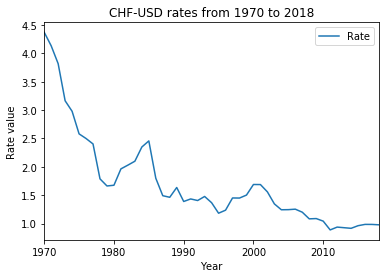

In [204]:
exchange_rates_swiss[['Rate', 'Year']].plot(kind = 'line', x = 'Year', y = 'Rate')
plt.title('CHF-USD rates from 1970 to 2018')
plt.ylabel('Rate value')
plt.show()

When looking at the rates evolution from 1970 to 2018, everything seems to be correct without outliers. High rates are present in the 70's. From 2010 the USD and the CHF are almost equal which is also expected.

#### 2) Producer prices

In [205]:
prices_annual.loc[prices_annual.Area == 'Switzerland']

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
389881,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1991,1991,LCU,982.0,NaN
389882,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1992,1992,LCU,481.0,NaN
389883,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1993,1993,LCU,676.0,NaN
389884,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1994,1994,LCU,619.0,NaN
389885,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1995,1995,LCU,761.0,NaN
389886,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1996,1996,LCU,547.0,NaN
389887,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1997,1997,LCU,728.0,NaN
389888,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1998,1998,LCU,471.0,NaN
389889,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1999,1999,LCU,659.0,NaN
389890,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),2000,2000,LCU,521.0,NaN


In [206]:
prices_arch.loc[prices_arch.Country == 'Switzerland']

,CountryCode,Country,ItemCode,Item,ElementGroup,ElementCode,Element,Year,Unit,Value,Flag
119920,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1966,LCU,260.0,F
119921,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1967,LCU,230.0,F
119922,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1968,LCU,230.0,F
119923,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1969,LCU,230.0,F
119924,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1970,LCU,230.0,F
119925,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1971,LCU,260.0,F
119926,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1972,LCU,340.0,F
119927,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1973,LCU,360.0,F
119928,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1974,LCU,400.0,F
119929,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1975,LCU,391.0,NaN


#### 2.1) Producer prices -annual

In [207]:
prices_annual.columns = prices_annual.columns.str.replace(' ', '_')

In [208]:
prices_annual.drop(['Flag'], axis = 1, inplace = True)
print('Size of the table before checking nan values ', prices_annual.size)

Size of the table before checking nan values  4525240


In [209]:
prices_annual.dropna(axis = 0, inplace = True)
print('Size of the table after removing nan values ', prices_annual.size)

Size of the table after removing nan values  4525240


The size of dataframe is the same after removing the nan values meaning that there are not nan values in the entire dataset.

In [210]:
prices_annual.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year_Code,Year,Unit,Value
0,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1993,1993,LCU,46000.0
1,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1994,1994,LCU,50000.0
2,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1995,1995,LCU,62000.0
3,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1996,1996,LCU,50000.0
4,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1997,1997,LCU,41000.0


In [211]:
items = prices_annual_swiss.Item.unique()
items

array(['Apples', 'Apricots', 'Artichokes', 'Asparagus', 'Barley',
       'Beans, green', 'Berries nes', 'Cabbages and other brassicas',
       'Carrots and turnips', 'Cauliflowers and broccoli', 'Cherries',
       'Chillies and peppers, green', 'Cucumbers and gherkins', 'Currants',
       'Eggs, hen, in shell', 'Gooseberries', 'Grapes', 'Honey, natural',
       'Hops', 'Kiwi fruit', 'Lettuce and chicory', 'Lupins', 'Maize',
       'Maize, green', 'Meat live weight, cattle',
       'Meat live weight, chicken', 'Meat live weight, goat',
       'Meat live weight, horse', 'Meat live weight, pig',
       'Meat live weight, rabbit', 'Meat live weight, sheep',
       'Meat live weight, turkey', 'Meat, cattle', 'Meat, chicken',
       'Meat, goat', 'Meat, horse', 'Meat, pig', 'Meat, rabbit',
       'Meat, sheep', 'Meat, turkey', 'Melons, other (inc.cantaloupes)',
       'Milk, whole fresh cow', 'Milk, whole fresh goat', 'Oats',
       'Onions, dry', 'Onions, shallots, green', 'Peaches and nect

Again for this dataset we check if Year_Code and Year are the same

In [212]:
(prices_annual.Year_Code - prices_annual.Year).unique()

array([0])

There are the same so to be consistent with the dataframe `exchange_rates` we keep the Year column

In [213]:
prices_annual.drop(['Year_Code'], axis = 1, inplace = True)

We finally want to know in which units are the prices

### Switzerland study

In [214]:
''' Swizerland case'''
prices_annual_swiss = prices_annual.copy()
prices_annual_swiss = prices_annual.loc[prices_annual.Area == 'Switzerland']

First let's check the different units contain in the switzerland dataset

In [215]:
prices_annual_swiss['Unit'].unique()

array(['LCU', 'SLC', 'USD'], dtype=object)

In [216]:
prices_annual_swiss['Element'].unique()

array(['Producer Price (LCU/tonne)', 'Producer Price (SLC/tonne)',
       'Producer Price (USD/tonne)'], dtype=object)

In [217]:
prices_annual_swiss['Element_Code'].unique()

array([5530, 5531, 5532])

Since three different units appear in the switzerland producer prices -annual dataset, we need to have a standard unit to able to compare values. This is achived jy joining `prices_annual_swiss` dataframe with `exchange_rates` dataframe. The standard unit will be dollars(USD) since the `exchange_rates` dataframe is based on dollars.

In [139]:
prices_annual_swiss_usd = prices_annual_swiss.loc[prices_annual_swiss.Unit == 'USD']
prices_annual_swiss_usd

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value
389937,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1991,USD,684.8
389938,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1992,USD,342.1
389939,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1993,USD,457.5
389940,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1994,USD,452.6
389941,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1995,USD,643.6
389942,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1996,USD,442.6
389943,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1997,USD,501.6
389944,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1998,USD,324.9
389945,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1999,USD,438.7
389946,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),2000,USD,308.5


In [140]:
prices_annual_swiss_lcu = prices_annual_swiss.loc[prices_annual_swiss.Unit == 'LCU']
prices_annual_swiss_lcu

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value
389881,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1991,LCU,982.0
389882,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1992,LCU,481.0
389883,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1993,LCU,676.0
389884,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1994,LCU,619.0
389885,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1995,LCU,761.0
389886,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1996,LCU,547.0
389887,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1997,LCU,728.0
389888,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1998,LCU,471.0
389889,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),1999,LCU,659.0
389890,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),2000,LCU,521.0


In [141]:
prices_annual_swiss_slc = prices_annual_swiss.loc[prices_annual_swiss.Unit == 'SLC']
prices_annual_swiss_slc

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value
389909,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),1991,SLC,982.0
389910,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),1992,SLC,481.0
389911,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),1993,SLC,676.0
389912,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),1994,SLC,619.0
389913,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),1995,SLC,761.0
389914,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),1996,SLC,547.0
389915,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),1997,SLC,728.0
389916,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),1998,SLC,471.0
389917,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),1999,SLC,659.0
389918,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),2000,SLC,521.0


The length of the prices with USD, SLC and LCU are the same. This means that prices are reproduced three times in the switzerland dataset.
To be sure let transform SLC and LCU unit into USD unit.

In [142]:
''' 
Check if datasets containg LCU and SLC units are the same.
Unit, Element, Element_Code are columns referencing the unit used and does not influence the values, we can then 
work without these columns.
'''
prices_annual_swiss_slc.loc[prices_annual_swiss_slc.Unit == 'LCU'][prices_annual_swiss_slc.columns.difference(['Unit', 'Element', 'Element_Code'])].equals(prices_annual_swiss_lcu.loc[prices_annual_swiss_lcu.Unit == 'SLC'][prices_annual_swiss_lcu.columns.difference(['Unit', 'Element', 'Element_Code'])])

True

The dataset containg with SLC and LCU unit are equals. Thus we only have to transform one of the two dataset into USD unit.

In [149]:
prices_annual_swiss_lcu_usd = prices_annual_swiss.loc[prices_annual_swiss.Unit == 'LCU'].merge(exchange_rates, left_on = ['Area_Code', 'Area', 'Year'], right_on = ['Area_Code', 'Area', 'Year'], suffixes=('', '_to_delete'))
prices_annual_swiss_lcu_usd['Value'] = prices_annual_swiss_lcu_usd['Value'] / prices_annual_swiss_lcu_usd['Rate']
prices_annual_swiss_lcu_usd.drop(columns = ['Rate'], inplace = True)
prices_annual_swiss_lcu_usd['Unit'] = 'USD'
prices_annual_swiss_lcu_usd['Element'] = 'Producer Price (USD/tonne)'
prices_annual_swiss_lcu_usd['Element_Code'] = 5532
prices_annual_swiss_lcu_usd

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value
0,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1991,USD,684.797768
1,211,Switzerland,526,Apricots,5532,Producer Price (USD/tonne),1991,USD,1377.266388
2,211,Switzerland,44,Barley,5532,Producer Price (USD/tonne),1991,USD,481.171548
3,211,Switzerland,414,"Beans, green",5532,Producer Price (USD/tonne),1991,USD,942.817294
4,211,Switzerland,358,Cabbages and other brassicas,5532,Producer Price (USD/tonne),1991,USD,837.517434
5,211,Switzerland,426,Carrots and turnips,5532,Producer Price (USD/tonne),1991,USD,396.094840
6,211,Switzerland,393,Cauliflowers and broccoli,5532,Producer Price (USD/tonne),1991,USD,1096.931660
7,211,Switzerland,531,Cherries,5532,Producer Price (USD/tonne),1991,USD,1769.874477
8,211,Switzerland,397,Cucumbers and gherkins,5532,Producer Price (USD/tonne),1991,USD,1246.164575
9,211,Switzerland,1062,"Eggs, hen, in shell",5532,Producer Price (USD/tonne),1991,USD,4062.064156


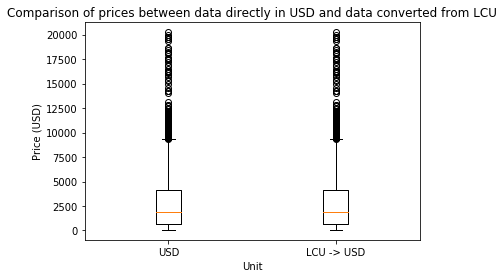

In [191]:
names = ['USD', 'LCU -> USD']
plt.boxplot([prices_annual_swiss_usd['Value'], prices_annual_swiss_lcu_usd['Value']])
plt.xticks([1, 2], names)
plt.title('Comparison of prices between data directly in USD and data converted from LCU')
plt.xlabel('Unit')
plt.ylabel('Price (USD)')
plt.show()

Distribution seems to be the same, let's check if these two datasets are equal.

In [152]:
prices_annual_swiss_usd.loc[prices_annual_swiss_usd.Unit == 'LCU'][prices_annual_swiss_usd.columns.difference(['Unit', 'Element', 'Element_Code'])].equals(prices_annual_swiss_lcu_usd.loc[prices_annual_swiss_lcu_usd.Unit == 'SLC'][prices_annual_swiss_lcu_usd.columns.difference(['Unit', 'Element', 'Element_Code'])])

True

Thus, we can conclude that for the case of swizerland, data is well organized without any outliers.

#### 2.2) Producer prices -archive

In [238]:
prices_arch['Unit'].unique()

array(['LCU'], dtype=object)

In [239]:
prices_arch['Element'].unique()

array(['Producer Price (LCU/tonne)'], dtype=object)

In [240]:
prices_arch['ElementCode'].unique()

array([5530])

`prices_arch` dataframe contains only prices in local currency unit (LCU). Thus, we need to convert everything into our standard format: USD unit.

In [223]:
prices_arch_swiss = prices_arch.loc[prices_arch.Country == 'Switzerland']
prices_arch_swiss

,CountryCode,Country,ItemCode,Item,ElementGroup,ElementCode,Element,Year,Unit,Value,Flag
119920,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1966,LCU,260.0,F
119921,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1967,LCU,230.0,F
119922,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1968,LCU,230.0,F
119923,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1969,LCU,230.0,F
119924,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1970,LCU,230.0,F
119925,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1971,LCU,260.0,F
119926,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1972,LCU,340.0,F
119927,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1973,LCU,360.0,F
119928,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1974,LCU,400.0,F
119929,211,Switzerland,515,Apples,53,5530,Producer Price (LCU/tonne),1975,LCU,391.0,NaN


In [234]:
prices_arch_swiss_lcu_usd = prices_arch_swiss.loc[prices_arch_swiss.Unit == 'LCU'].merge(exchange_rates, left_on = ['CountryCode', 'Country', 'Year'], right_on = ['Area_Code', 'Area', 'Year'], suffixes=('', '_to_delete'))
prices_arch_swiss_lcu_usd['Value'] = prices_arch_swiss_lcu_usd['Value'] / prices_arch_swiss_lcu_usd['Rate']
prices_arch_swiss_lcu_usd.drop(columns = ['Rate', 'ElementGroup', 'Area_Code', 'Area', 'Flag'], inplace = True)
prices_arch_swiss_lcu_usd['Unit'] = 'USD'
prices_arch_swiss_lcu_usd['Element'] = 'Producer Price (USD/tonne)'
prices_arch_swiss_lcu_usd['ElementCode'] = 5532
prices_arch_swiss_lcu_usd

,CountryCode,Country,ItemCode,Item,ElementCode,Element,Year,Unit,Value
0,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),1970,USD,52.595472
1,211,Switzerland,526,Apricots,5532,Producer Price (USD/tonne),1970,USD,189.801052
2,211,Switzerland,44,Barley,5532,Producer Price (USD/tonne),1970,USD,99.702721
3,211,Switzerland,414,"Beans, green",5532,Producer Price (USD/tonne),1970,USD,308.941230
4,211,Switzerland,358,Cabbages and other brassicas,5532,Producer Price (USD/tonne),1970,USD,123.256346
5,211,Switzerland,426,Carrots and turnips,5532,Producer Price (USD/tonne),1970,USD,144.065859
6,211,Switzerland,945,Cattle Live Weight,5532,Producer Price (USD/tonne),1970,USD,922.021496
7,211,Switzerland,393,Cauliflowers and broccoli,5532,Producer Price (USD/tonne),1970,USD,239.195061
8,211,Switzerland,531,Cherries,5532,Producer Price (USD/tonne),1970,USD,212.668649
9,211,Switzerland,1095,Chicken Live Weight,5532,Producer Price (USD/tonne),1970,USD,582.666362


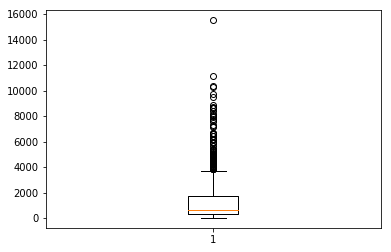

In [236]:
plt.boxplot(prices_arch_swiss_lcu_usd['Value'])
plt.show()

Producer prices seems to be smaller in `prices_arch_swiss_lcu_usd` dataframe compare to `prices_annual_swiss_lcu_usd` dataframe which is expected since `prices_arch_swiss_lcu_usd` dataset correspond to prices from 1970 to 1996 and  `prices_arch_swiss_lcu_usd` dataset correspond to prices from 1997 to 2018 and we all know that prices increased over the years.

We then have to concatenate `prices_arch_swiss_lcu_usd` and `prices_annual_swiss_lcu_usd` dataframe to have values from 1970 tp 2018 in only one dataframe.
We call this new dataframe `producer_prices_swiss`

In [243]:
producer_prices_swiss = pd.concat([prices_arch_swiss_lcu_usd, prices_annual_swiss_lcu_usd], ignore_index=True, sort = False)
producer_prices_swiss

,CountryCode,Country,ItemCode,Item,ElementCode,Element,Year,Unit,Value,Area_Code,Area,Item_Code,Element_Code
0,211.0,Switzerland,515.0,Apples,5532.0,Producer Price (USD/tonne),1970,USD,52.595472,NaN,NaN,NaN,NaN
1,211.0,Switzerland,526.0,Apricots,5532.0,Producer Price (USD/tonne),1970,USD,189.801052,NaN,NaN,NaN,NaN
2,211.0,Switzerland,44.0,Barley,5532.0,Producer Price (USD/tonne),1970,USD,99.702721,NaN,NaN,NaN,NaN
3,211.0,Switzerland,414.0,"Beans, green",5532.0,Producer Price (USD/tonne),1970,USD,308.941230,NaN,NaN,NaN,NaN
4,211.0,Switzerland,358.0,Cabbages and other brassicas,5532.0,Producer Price (USD/tonne),1970,USD,123.256346,NaN,NaN,NaN,NaN
5,211.0,Switzerland,426.0,Carrots and turnips,5532.0,Producer Price (USD/tonne),1970,USD,144.065859,NaN,NaN,NaN,NaN
6,211.0,Switzerland,945.0,Cattle Live Weight,5532.0,Producer Price (USD/tonne),1970,USD,922.021496,NaN,NaN,NaN,NaN
7,211.0,Switzerland,393.0,Cauliflowers and broccoli,5532.0,Producer Price (USD/tonne),1970,USD,239.195061,NaN,NaN,NaN,NaN
8,211.0,Switzerland,531.0,Cherries,5532.0,Producer Price (USD/tonne),1970,USD,212.668649,NaN,NaN,NaN,NaN
9,211.0,Switzerland,1095.0,Chicken Live Weight,5532.0,Producer Price (USD/tonne),1970,USD,582.666362,NaN,NaN,NaN,NaN


The standard local currency(SLC) and local currency unit(LCU) should naturaly be the same. Let's investigate that.

In [31]:
''' When comparing the dataframe containing LCU with dataframe containing SLC: Unit, Elementm Element_Code
    refer to the Unit values, thus they do not have to be taken into account.
'''
prices_annual.loc[prices.Unit == 'LCU'][prices_annual.columns.difference(['Unit', 'Element', 'Element_Code'])].equals(prices_annual.loc[prices_annual.Unit == 'SLC'][prices_annul.columns.difference(['Unit', 'Element', 'Element_Code'])])


False

The tables are not the same. Let's print some values containing SLC values to maybe point out some interesting pattern.

In [220]:
prices_annual.loc[prices_annual.Unit == 'USD']

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value
722,3,Albania,515,Apples,5532,Producer Price (USD/tonne),1993,USD,461.1
723,3,Albania,515,Apples,5532,Producer Price (USD/tonne),1995,USD,323.6
724,3,Albania,515,Apples,5532,Producer Price (USD/tonne),1996,USD,325.4
725,3,Albania,515,Apples,5532,Producer Price (USD/tonne),1997,USD,253.1
726,3,Albania,515,Apples,5532,Producer Price (USD/tonne),1998,USD,248.9
727,3,Albania,515,Apples,5532,Producer Price (USD/tonne),1999,USD,270.2
728,3,Albania,515,Apples,5532,Producer Price (USD/tonne),2000,USD,257.5
729,3,Albania,515,Apples,5532,Producer Price (USD/tonne),2001,USD,257.9
730,3,Albania,515,Apples,5532,Producer Price (USD/tonne),2002,USD,274.7
731,3,Albania,515,Apples,5532,Producer Price (USD/tonne),2003,USD,317.6


In [219]:
prices_annual.loc[prices_annual.Unit == 'SLC']

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value
18,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),1993,SLC,46000.0
19,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),1994,SLC,50000.0
20,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),1995,SLC,62000.0
21,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),1996,SLC,50000.0
22,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),1997,SLC,41000.0
23,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),1998,SLC,42000.0
24,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),1999,SLC,52000.0
25,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),2000,SLC,67000.0
26,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),2001,SLC,83000.0
27,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),2002,SLC,75000.0


In [33]:
diff_lcu_slc = pd.concat([prices.loc[prices.Unit == 'LCU'][prices.columns.difference(['Unit', 'Element', 'Element_Code'])],prices.loc[prices.Unit == 'SLC'][prices.columns.difference(['Unit', 'Element', 'Element_Code'])]]).drop_duplicates(keep=False)
diff_lcu_slc.head()

,Area,Area_Code,Item,Item_Code,Value,Year
7611,Argentina,9,Barley,44,743170.0,1991
7650,Argentina,9,"Beans, dry",176,5168000.0,1991
7698,Argentina,9,Beeswax,1183,25000000.0,1991
7728,Argentina,9,Canary seed,101,1621438.0,1991
7923,Argentina,9,Cotton lint,767,13690000.0,1991


In [34]:
diff_lcu_slc[diff_lcu_slc.apply(lambda x: x.Area == 'Argentina' and x.Item_Code == 44, axis = 1)]

,Area,Area_Code,Item,Item_Code,Value,Year
7611,Argentina,9,Barley,44,743170.0,1991
7624,Argentina,9,Barley,44,74.3,1991


In [35]:
prices_lcu = prices.loc[prices.Unit == 'LCU']
prices_lcu

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value
0,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1993,LCU,46000.0
1,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1994,LCU,50000.0
2,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1995,LCU,62000.0
3,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1996,LCU,50000.0
4,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1997,LCU,41000.0
5,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1998,LCU,42000.0
6,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),1999,LCU,52000.0
7,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),2000,LCU,67000.0
8,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),2001,LCU,83000.0
9,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),2002,LCU,75000.0


In [49]:
prices_slc = prices.loc[prices.Unit == 'SLC']
prices_slc

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value
18,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),1993,SLC,46000.0
19,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),1994,SLC,50000.0
20,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),1995,SLC,62000.0
21,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),1996,SLC,50000.0
22,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),1997,SLC,41000.0
23,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),1998,SLC,42000.0
24,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),1999,SLC,52000.0
25,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),2000,SLC,67000.0
26,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),2001,SLC,83000.0
27,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),2002,SLC,75000.0


In [37]:
prices_usd = prices.loc[prices.Unit == 'USD']
prices_usd

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value
722,3,Albania,515,Apples,5532,Producer Price (USD/tonne),1993,USD,461.1
723,3,Albania,515,Apples,5532,Producer Price (USD/tonne),1995,USD,323.6
724,3,Albania,515,Apples,5532,Producer Price (USD/tonne),1996,USD,325.4
725,3,Albania,515,Apples,5532,Producer Price (USD/tonne),1997,USD,253.1
726,3,Albania,515,Apples,5532,Producer Price (USD/tonne),1998,USD,248.9
727,3,Albania,515,Apples,5532,Producer Price (USD/tonne),1999,USD,270.2
728,3,Albania,515,Apples,5532,Producer Price (USD/tonne),2000,USD,257.5
729,3,Albania,515,Apples,5532,Producer Price (USD/tonne),2001,USD,257.9
730,3,Albania,515,Apples,5532,Producer Price (USD/tonne),2002,USD,274.7
731,3,Albania,515,Apples,5532,Producer Price (USD/tonne),2003,USD,317.6


(array([  5.13610000e+04,   3.10200000e+04,   1.66730000e+04,
          1.18270000e+04,   8.87100000e+03,   6.12700000e+03,
          4.61100000e+03,   3.38100000e+03,   2.64300000e+03,
          1.97100000e+03,   1.59900000e+03,   1.28500000e+03,
          1.06800000e+03,   8.36000000e+02,   6.28000000e+02,
          6.27000000e+02,   4.59000000e+02,   4.10000000e+02,
          3.62000000e+02,   3.22000000e+02,   2.40000000e+02,
          2.02000000e+02,   1.55000000e+02,   1.38000000e+02,
          1.03000000e+02,   9.40000000e+01,   9.20000000e+01,
          5.90000000e+01,   8.20000000e+01,   6.40000000e+01,
          6.20000000e+01,   5.50000000e+01,   5.10000000e+01,
          4.40000000e+01,   4.20000000e+01,   3.60000000e+01,
          4.10000000e+01,   1.60000000e+01,   2.10000000e+01,
          2.40000000e+01,   2.50000000e+01,   2.30000000e+01,
          2.00000000e+01,   2.20000000e+01,   1.80000000e+01,
          2.30000000e+01,   2.70000000e+01,   1.00000000e+01,
        

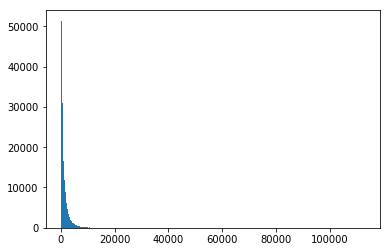

In [40]:
plt.hist(prices_usd['Value'], bins = 300)

In [41]:
prices_usd['Value'].min()

0.0

In [42]:
prices_usd['Value'].max()

113149.2

{'whiskers': [<matplotlib.lines.Line2D at 0x1251eba90>,
 'caps': [<matplotlib.lines.Line2D at 0x1251f03c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1251eb860>],
 'medians': [<matplotlib.lines.Line2D at 0x1251f0c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1251f6128>],
 'means': []}

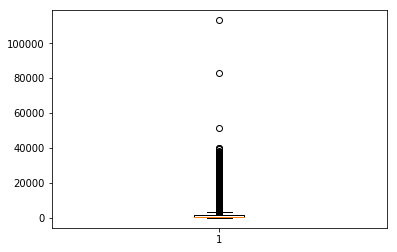

In [43]:
plt.boxplot(prices_usd['Value'])

{'whiskers': [<matplotlib.lines.Line2D at 0x125d66470>,
 'caps': [<matplotlib.lines.Line2D at 0x125d66d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x125d66320>],
 'medians': [<matplotlib.lines.Line2D at 0x125d6f5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x125d6fa20>],
 'means': []}

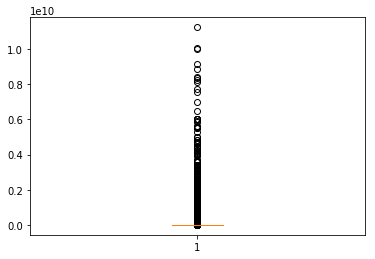

In [46]:
plt.boxplot(prices_lcu['Value'])

In [47]:
prices_lcu['Value'].max()

11250000000.0

{'whiskers': [<matplotlib.lines.Line2D at 0x125e69e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1272a9860>,
 'boxes': [<matplotlib.lines.Line2D at 0x125e69d30>],
 'medians': [<matplotlib.lines.Line2D at 0x1272b1160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1272b15c0>],
 'means': []}

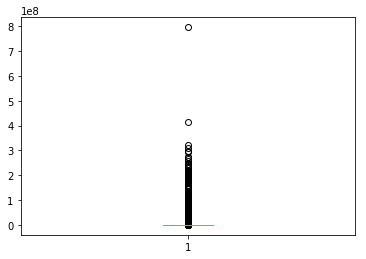

In [50]:
plt.boxplot(prices_slc['Value'])

In [51]:
prices_slc['Value'].max()

796311800.0

In [19]:
plt.show()

Let see what are the three top values

In [45]:
prices_usd.loc[prices_usd.Value == 113149.2]

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value
101379,98,Croatia,1069,"Meat, duck",5532,Producer Price (USD/tonne),1992,USD,113149.2


In [83]:
prices_lcu[prices_lcu.apply(lambda x: x.Area == 'Argentina' and x.Item_Code == 44, axis = 1)]

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Unit,Value
7611,9,Argentina,44,Barley,5530,Producer Price (LCU/tonne),1991,LCU,743170.0
7612,9,Argentina,44,Barley,5530,Producer Price (LCU/tonne),1992,LCU,72.0
7613,9,Argentina,44,Barley,5530,Producer Price (LCU/tonne),1993,LCU,72.0
7614,9,Argentina,44,Barley,5530,Producer Price (LCU/tonne),1994,LCU,75.0
7615,9,Argentina,44,Barley,5530,Producer Price (LCU/tonne),1995,LCU,120.0
7616,9,Argentina,44,Barley,5530,Producer Price (LCU/tonne),1996,LCU,156.0
7617,9,Argentina,44,Barley,5530,Producer Price (LCU/tonne),1997,LCU,91.0
7618,9,Argentina,44,Barley,5530,Producer Price (LCU/tonne),1998,LCU,77.0
7619,9,Argentina,44,Barley,5530,Producer Price (LCU/tonne),1999,LCU,99.0
7620,9,Argentina,44,Barley,5530,Producer Price (LCU/tonne),2000,LCU,97.0


Since there are more than one units we will need to join this `prices` dataframe with the `exchange_rates` dataframe to convert the local currencies into dollars. This is required to have comparable results.

In [ ]:
''' For now do not know the diff  '''
prices[prices.Unit.apply(lambda x: (x == 'USD') or (x == 'LCU'))]

In [131]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

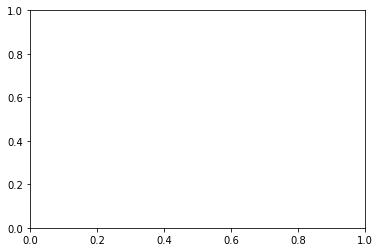

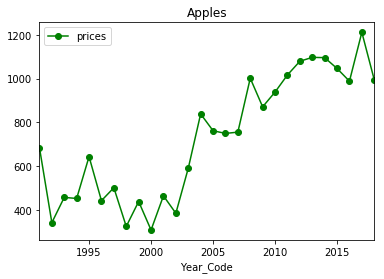

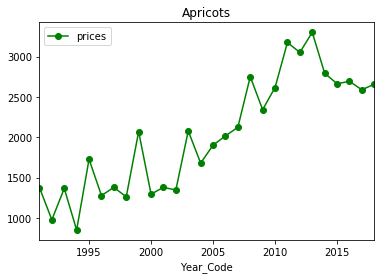

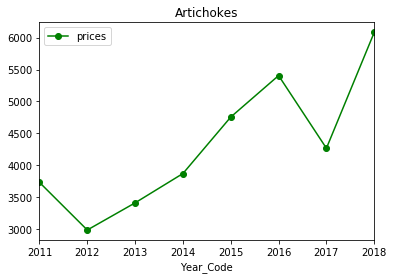

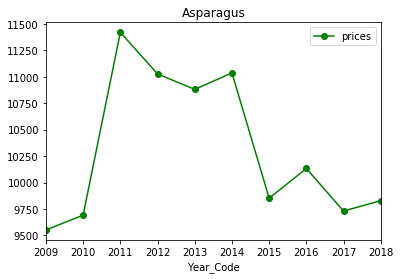

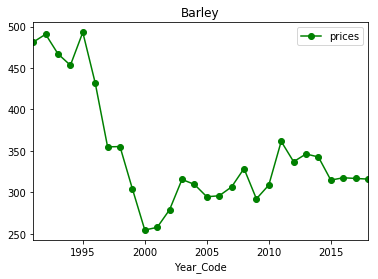

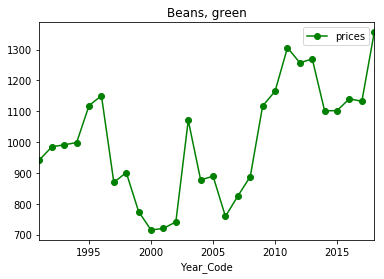

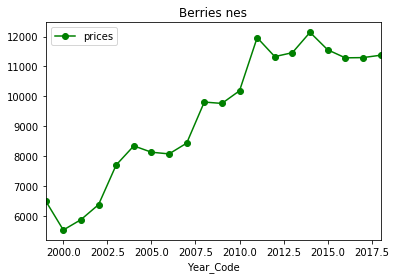

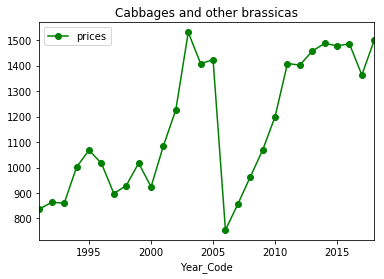

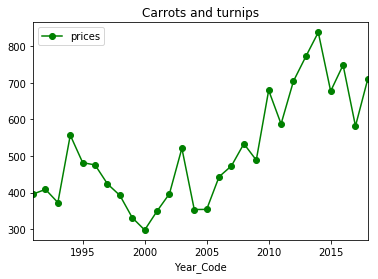

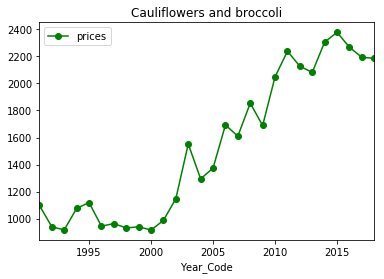

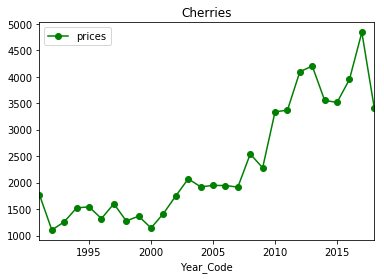

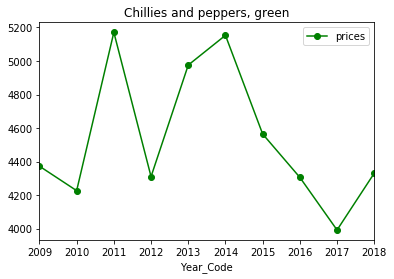

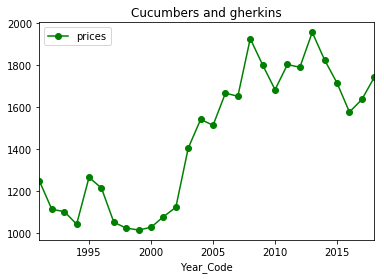

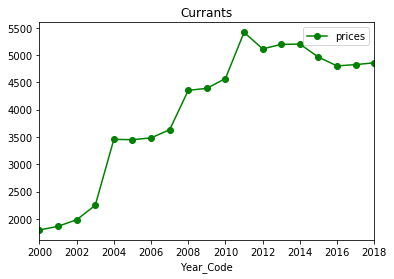

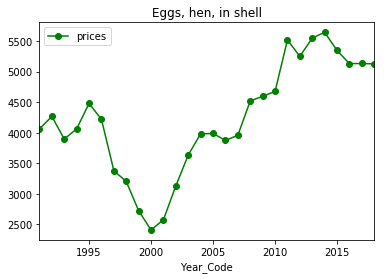

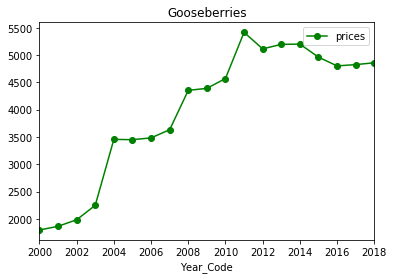

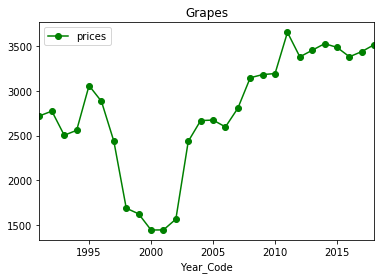

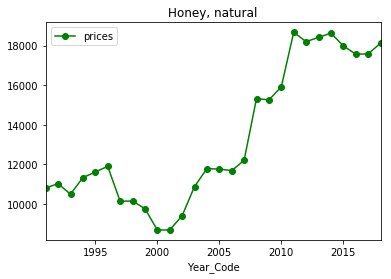

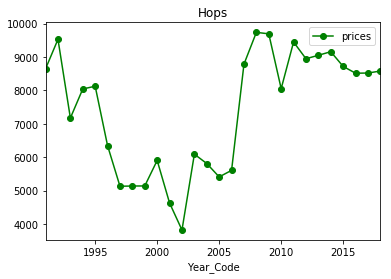

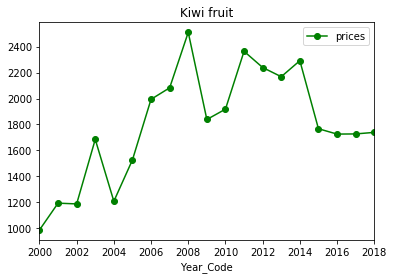

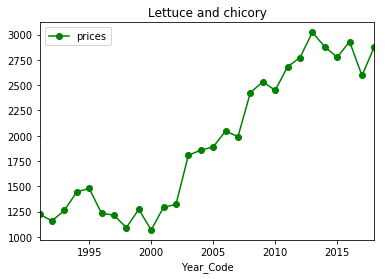

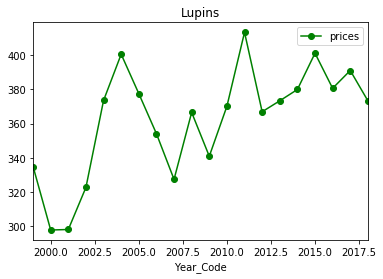

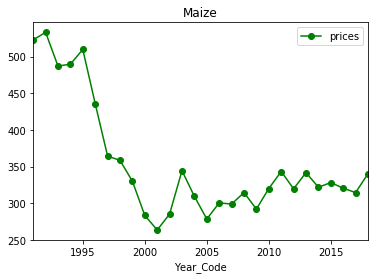

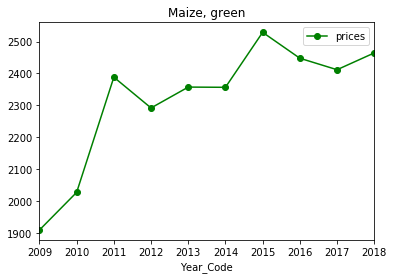

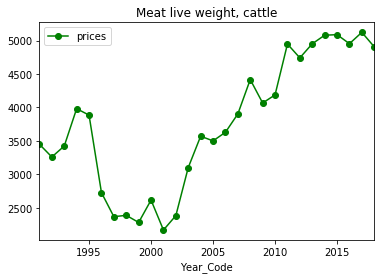

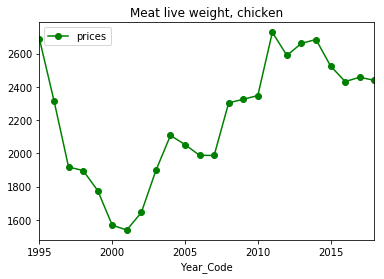

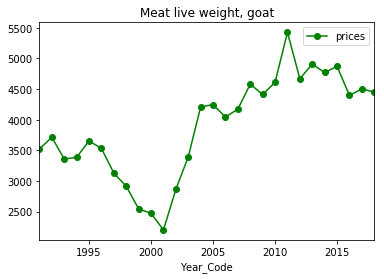

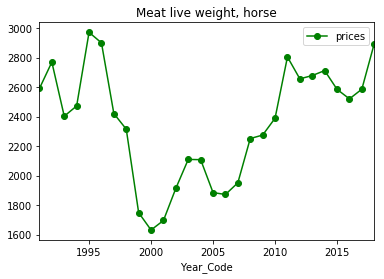

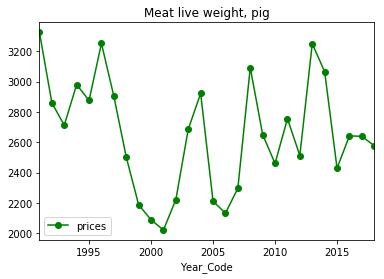

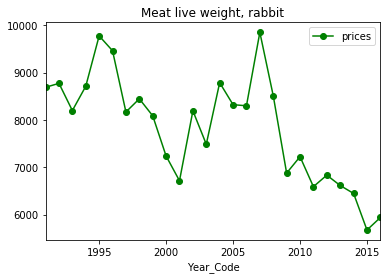

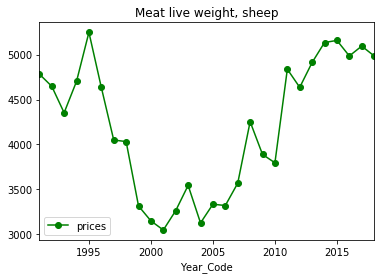

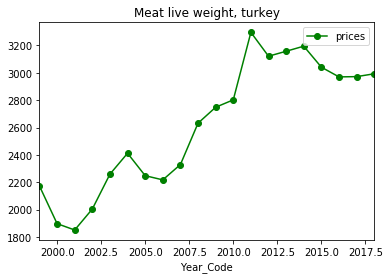

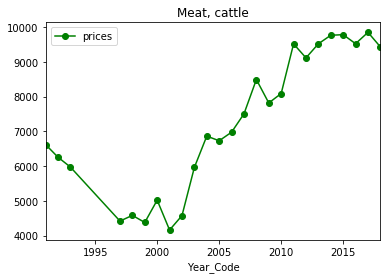

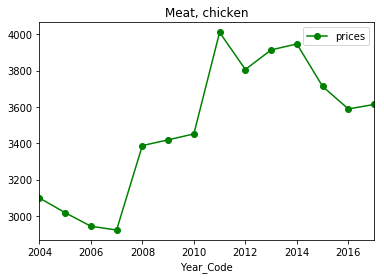

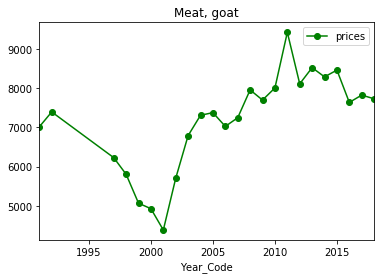

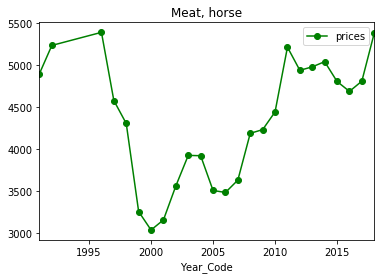

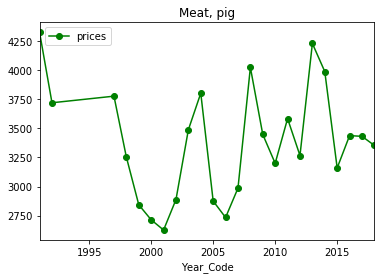

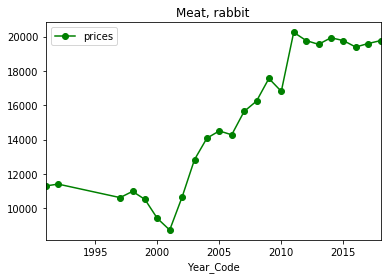

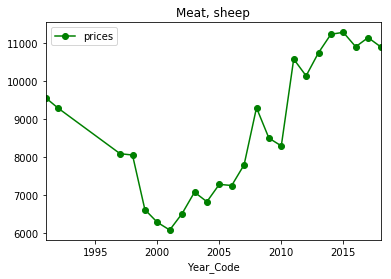

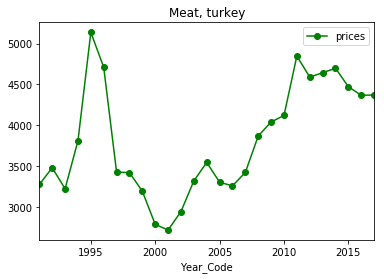

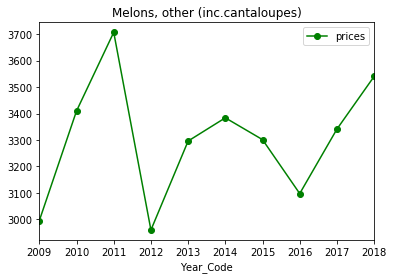

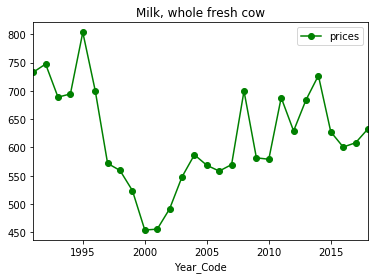

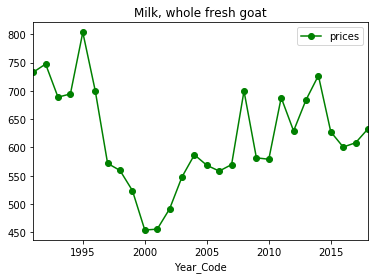

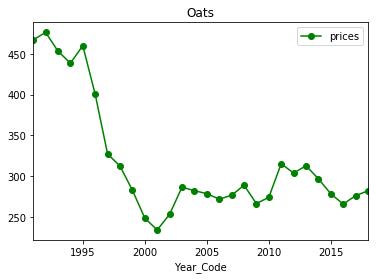

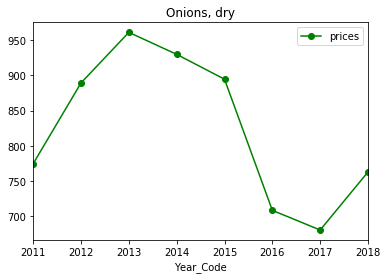

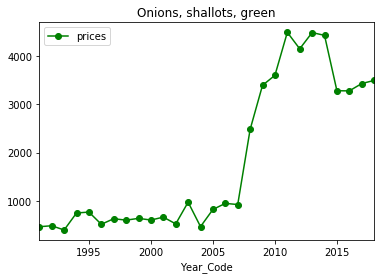

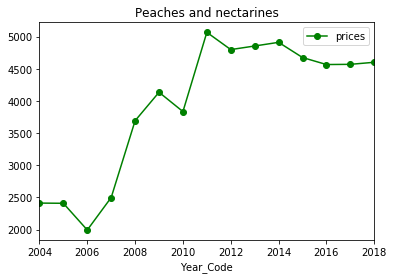

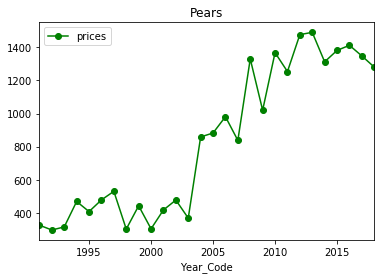

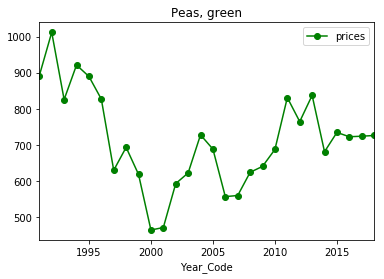

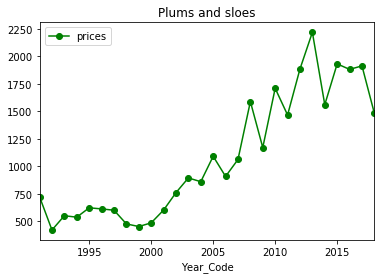

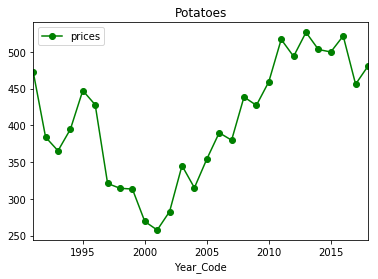

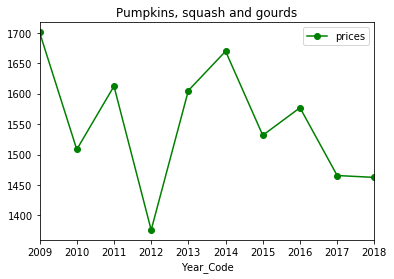

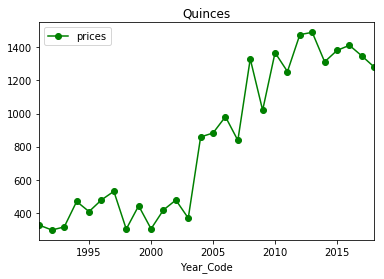

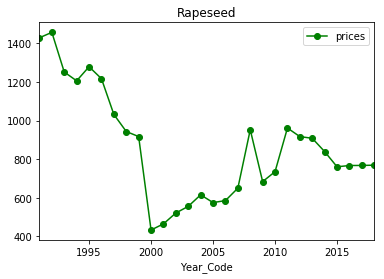

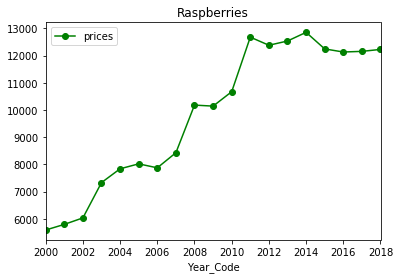

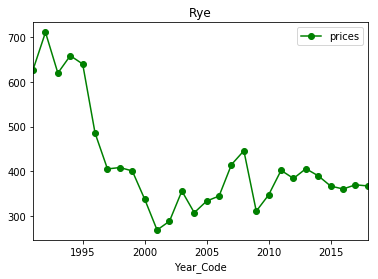

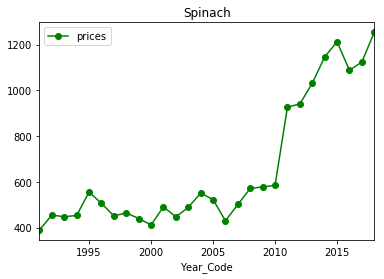

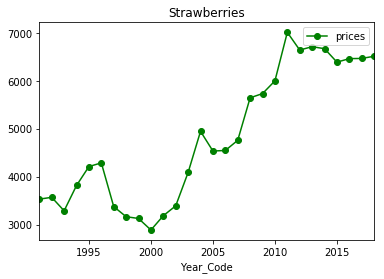

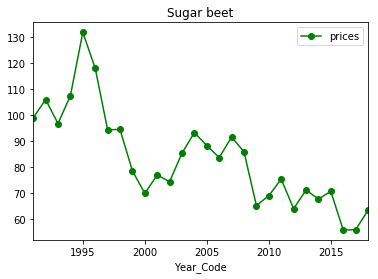

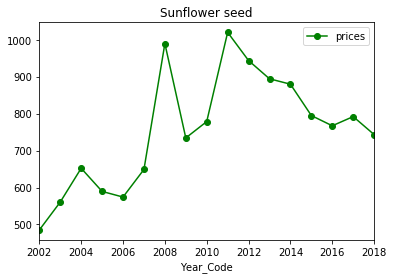

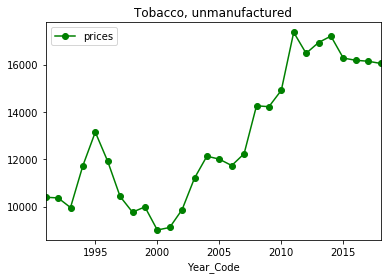

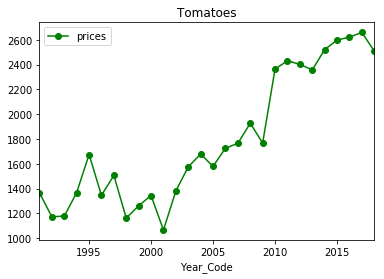

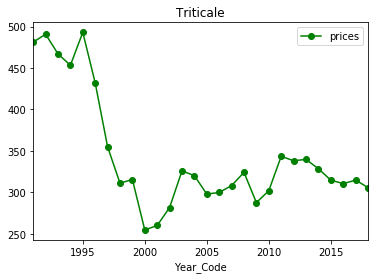

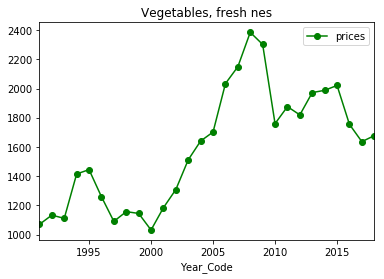

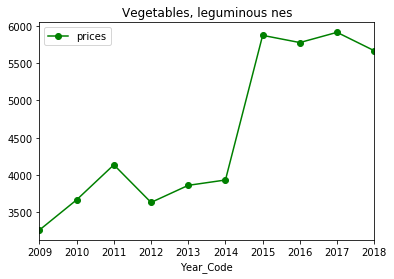

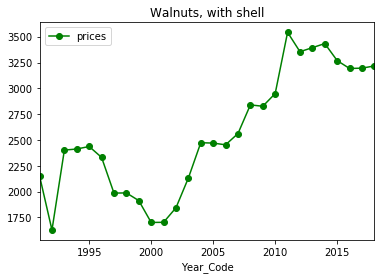

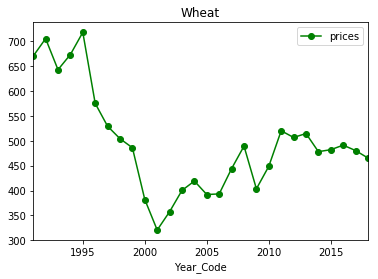

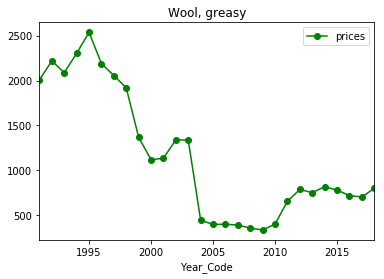

In [139]:
# gca stands for 'get current axis'
ax = plt.gca()

for item in items:
    title = item
    prices.loc[prices.Item == item].plot(kind = 'line', x = 'Year_Code', y = 'Value', label = 'prices', title = title, color = 'green', marker = 'o')
plt.show()

## Switzerland

In [291]:
exchange_rates_swiss = exchange_rates.loc[exchange_rates.Area_Code == 211] 
exchange_rates_swiss.head()

,Area_Code,Area,Year,Rate
8657,211,Switzerland,1970,4.3730
8658,211,Switzerland,1971,4.1339
8659,211,Switzerland,1972,3.8192
8660,211,Switzerland,1973,3.1648
8661,211,Switzerland,1974,2.9792


In [292]:
prices_swiss = prices.loc[prices.Area_Code == 211]
prices_swiss.head()

,Area_Code,Area,Item_Code,Element_Code,Element,Year,Unit,Value
Item,,,,,,,,
Apples,211,Switzerland,515,5530,Producer Price (LCU/tonne),1991,LCU,982.0
Apples,211,Switzerland,515,5530,Producer Price (LCU/tonne),1992,LCU,481.0
Apples,211,Switzerland,515,5530,Producer Price (LCU/tonne),1993,LCU,676.0
Apples,211,Switzerland,515,5530,Producer Price (LCU/tonne),1994,LCU,619.0
Apples,211,Switzerland,515,5530,Producer Price (LCU/tonne),1995,LCU,761.0


In [293]:
total_prices_swiss = prices_swiss.loc[prices_swiss.Unit == 'LCU'].merge(exchange_rates, left_on = ['Area_Code', 'Year'], right_on = ['Area_Code', 'Year'], suffixes=('', '_delete'))
total_prices_swiss.drop('Area_delete', axis = 1, inplace = True)
total_prices_swiss.head()

,Area_Code,Area,Item_Code,Element_Code,Element,Year,Unit,Value,Rate
0,211,Switzerland,515,5530,Producer Price (LCU/tonne),1991,LCU,982.0,1.434
1,211,Switzerland,526,5530,Producer Price (LCU/tonne),1991,LCU,1975.0,1.434
2,211,Switzerland,44,5530,Producer Price (LCU/tonne),1991,LCU,690.0,1.434
3,211,Switzerland,414,5530,Producer Price (LCU/tonne),1991,LCU,1352.0,1.434
4,211,Switzerland,358,5530,Producer Price (LCU/tonne),1991,LCU,1201.0,1.434


In [294]:
total_prices_swiss['Price'] = total_prices_swiss.Value / total_prices_swiss.Rate
total_prices_swiss.drop(['Value', 'Rate'], axis = 1, inplace = True)
total_prices_swiss.head()

,Area_Code,Area,Item_Code,Element_Code,Element,Year,Unit,Price
0,211,Switzerland,515,5530,Producer Price (LCU/tonne),1991,LCU,684.797768
1,211,Switzerland,526,5530,Producer Price (LCU/tonne),1991,LCU,1377.266388
2,211,Switzerland,44,5530,Producer Price (LCU/tonne),1991,LCU,481.171548
3,211,Switzerland,414,5530,Producer Price (LCU/tonne),1991,LCU,942.817294
4,211,Switzerland,358,5530,Producer Price (LCU/tonne),1991,LCU,837.517434


In [295]:
total_prices_swiss['Unit'] = 'USD'
total_prices_swiss.head()

,Area_Code,Area,Item_Code,Element_Code,Element,Year,Unit,Price
0,211,Switzerland,515,5530,Producer Price (LCU/tonne),1991,USD,684.797768
1,211,Switzerland,526,5530,Producer Price (LCU/tonne),1991,USD,1377.266388
2,211,Switzerland,44,5530,Producer Price (LCU/tonne),1991,USD,481.171548
3,211,Switzerland,414,5530,Producer Price (LCU/tonne),1991,USD,942.817294
4,211,Switzerland,358,5530,Producer Price (LCU/tonne),1991,USD,837.517434


In [ ]:
total_prices_swiss = prices

## Others

In [67]:
prices = pd.read_csv('data/Prices_E_All_Data.csv', delimiter = ',', encoding = 'ISO-8859-1')
prices.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1991,Y1991F,Y1992,...,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F
0,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),LCU,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),SLC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Afghanistan,515,Apples,5530,Producer Price (LCU/tonne),LCU,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Afghanistan,515,Apples,5531,Producer Price (SLC/tonne),SLC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Afghanistan,526,Apricots,5530,Producer Price (LCU/tonne),LCU,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
prices.columns = prices.columns.str.replace(' ', '_')
prices = prices.loc[prices.Area == 'Switzerland']
prices.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Unit,Y1991,Y1991F,Y1992,...,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F
23328,211,Switzerland,515,Apples,5530,Producer Price (LCU/tonne),LCU,982.0,NaN,481.0,...,1004.0,NaN,1007.0,NaN,974.0,NaN,1193.0,NaN,973.0,NaN
23329,211,Switzerland,515,Apples,5531,Producer Price (SLC/tonne),SLC,982.0,NaN,481.0,...,1004.0,NaN,1007.0,NaN,974.0,NaN,1193.0,NaN,973.0,NaN
23330,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),USD,684.8,NaN,342.1,...,1095.9,NaN,1046.4,NaN,988.4,NaN,1211.5,NaN,995.0,NaN
23331,211,Switzerland,526,Apricots,5530,Producer Price (LCU/tonne),LCU,1975.0,NaN,1376.0,...,2561.0,NaN,2564.0,NaN,2655.0,NaN,2550.0,NaN,2600.0,NaN
23332,211,Switzerland,526,Apricots,5531,Producer Price (SLC/tonne),SLC,1975.0,NaN,1376.0,...,2561.0,NaN,2564.0,NaN,2655.0,NaN,2550.0,NaN,2600.0,NaN


In [70]:
prices = prices.loc[prices.Unit == 'USD']
prices.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Unit,Y1991,Y1991F,Y1992,...,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F
23330,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),USD,684.8,NaN,342.1,...,1095.9,NaN,1046.4,NaN,988.4,NaN,1211.5,NaN,995.0,NaN
23333,211,Switzerland,526,Apricots,5532,Producer Price (USD/tonne),USD,1377.3,NaN,978.5,...,2795.4,NaN,2664.2,NaN,2694.4,NaN,2589.5,NaN,2658.8,NaN
23336,211,Switzerland,366,Artichokes,5532,Producer Price (USD/tonne),USD,NaN,NaN,NaN,...,3868.4,NaN,4754.9,NaN,5406.0,NaN,4265.1,NaN,6084.6,NaN
23339,211,Switzerland,367,Asparagus,5532,Producer Price (USD/tonne),USD,NaN,NaN,NaN,...,11036.4,NaN,9851.6,NaN,10133.0,NaN,9730.6,NaN,9828.4,NaN
23342,211,Switzerland,44,Barley,5532,Producer Price (USD/tonne),USD,481.2,NaN,490.7,...,342.7,NaN,314.8,NaN,317.6,NaN,316.8,NaN,316.0,NaN


For every year, we have a column name for example: Y1991 and another one Y1991F.
It is most likely to always take the comumn name without the F.

In [80]:
prices.Y1991F.loc[prices.Y1991F == prices.Y1991F]

23447    Fc
Name: Y1991F, dtype: object

In [81]:
prices = prices[prices.columns.drop(list(prices.filter(regex='F')))]
prices.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Unit,Y1991,Y1992,Y1993,...,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018
23330,211,Switzerland,515,Apples,5532,Producer Price (USD/tonne),USD,684.8,342.1,457.5,...,871.2,938.7,1016.8,1079.3,1097.2,1095.9,1046.4,988.4,1211.5,995.0
23333,211,Switzerland,526,Apricots,5532,Producer Price (USD/tonne),USD,1377.3,978.5,1367.1,...,2343.4,2617.7,3175.5,3052.2,3301.3,2795.4,2664.2,2694.4,2589.5,2658.8
23336,211,Switzerland,366,Artichokes,5532,Producer Price (USD/tonne),USD,NaN,NaN,NaN,...,NaN,NaN,3729.6,2981.8,3408.1,3868.4,4754.9,5406.0,4265.1,6084.6
23339,211,Switzerland,367,Asparagus,5532,Producer Price (USD/tonne),USD,NaN,NaN,NaN,...,9551.1,9692.2,11420.6,11027.2,10881.4,11036.4,9851.6,10133.0,9730.6,9828.4
23342,211,Switzerland,44,Barley,5532,Producer Price (USD/tonne),USD,481.2,490.7,467.0,...,292.2,308.8,361.5,337.0,346.3,342.7,314.8,317.6,316.8,316.0


In [93]:
pd.DataFrame(prices.set_index(['Y1991', 'Y1992']).stack())

0
Y1991  Y1992                           
684.8  342.1  Area_Code             211
              Area          Switzerland
              Item_Code             515
              Item               Apples
              Element_Code         5532
...                                 ...
2008.4 2218.7 Y2014               816.5
              Y2015               779.3
              Y2016               717.5
              Y2017               702.7
              Y2018               798.7

[2007 rows x 1 columns]

In [52]:
prices2 = pd.read_csv('data/Prices_E_All_Data_NOFLAG.csv', delimiter = ',', encoding = 'ISO-8859-1')
prices.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1991,Y1991F,Y1992,...,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F
0,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),LCU,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),SLC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Afghanistan,515,Apples,5530,Producer Price (LCU/tonne),LCU,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Afghanistan,515,Apples,5531,Producer Price (SLC/tonne),SLC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Afghanistan,526,Apricots,5530,Producer Price (LCU/tonne),LCU,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#prices = prices.loc[prices.Country == 'Switzerland']
prices = prices.loc[prices.Unit != 'LCU']
prices.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag
